<a href="https://colab.research.google.com/github/Sufyan-Dawnak/Bharat_Intern_Data_Science_/blob/main/Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Bharat Intern Task 1</b></h1>
<h3>Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.</h3>

<h2><b>IBM Stock prediction using LSTM</b></h2>

<h3><b>Model</b></h3>
<h4>Long Short-Term Memory Networks is a deep learning, sequential neural network that allows information to persist. It is a special type of Recurrent Neural Network which is capable of handling the vanishing gradient problem faced by RNN. LSTM was designed by Hochreiter and Schmidhuber that resolves the problem caused by traditional rnns and machine learning algorithms. LSTM can be implemented in Python using the Keras library.</h4>

<h3><b>DataSet</b></h3>
<ol>
  <li> Dataset : IBM_Stock_Data.csv</li>
  <li> Source : Kaggle</li>
  <li> Link : <a href="https://www.kaggle.com/datasets/bhanuprasanna527/stock-market-prediction"> https://www.kaggle.com/datasets/bhanuprasanna527/stock-market-prediction </a></li>
</ol>


<h3><b>Importing Dataset</b></h3>

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("IBM.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,139.263855,139.378586,137.868073,139.063095,108.887886,3628365
1,2018-07-17,138.384323,138.623322,137.036331,137.179733,107.413177,5331148
2,2018-07-18,137.198853,138.432129,136.462708,138.164429,108.184204,7254324
3,2018-07-19,141.347992,143.919693,140.774384,142.676865,111.717484,15329967
4,2018-07-20,142.045883,142.313583,139.827911,139.913956,109.554123,6709672
5,2018-07-23,139.913956,140.248566,138.632889,139.292542,109.067535,4077203
6,2018-07-24,140.248566,140.573608,139.502869,139.942642,109.576599,4070614
7,2018-07-25,139.588913,140.200760,139.101334,140.172089,109.756233,3797921
8,2018-07-26,140.946457,142.705551,140.181641,140.258133,109.823601,4997788
9,2018-07-27,140.430206,140.669220,138.298279,138.766724,108.655807,3921768


<h3><b>Data Tranformation & Cleaning </b></h3>

In [ ]:
#  Using date and closing price of stocks for predictions
df = df[['Date','Close']]
df

,Date,Close
0,2018-07-16,139.063095
1,2018-07-17,137.179733
2,2018-07-18,138.164429
3,2018-07-19,142.676865
4,2018-07-20,139.913956
...,...,...
1252,2023-07-07,132.080002
1253,2023-07-10,132.899994
1254,2023-07-11,134.440002
1255,2023-07-12,132.839996


In [ ]:
df['Date']

0       2018-07-16
1       2018-07-17
2       2018-07-18
3       2018-07-19
4       2018-07-20
           ...    
1252    2023-07-07
1253    2023-07-10
1254    2023-07-11
1255    2023-07-12
1256    2023-07-13
Name: Date, Length: 1257, dtype: object

In [ ]:
import datetime

def string_to_date(string):
  string = string.split('-')
  year, month, day = int(string[0]), int(string[1]), int(string[2])
  return datetime.datetime(year=year,month=month,day=day)

df['Date'] = df['Date'].apply(string_to_date)
df['Date']

0      2018-07-16
1      2018-07-17
2      2018-07-18
3      2018-07-19
4      2018-07-20
          ...    
1252   2023-07-07
1253   2023-07-10
1254   2023-07-11
1255   2023-07-12
1256   2023-07-13
Name: Date, Length: 1257, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2018-07-16,139.063095
2018-07-17,137.179733
2018-07-18,138.164429
2018-07-19,142.676865
2018-07-20,139.913956
...,...
2023-07-07,132.080002
2023-07-10,132.899994
2023-07-11,134.440002


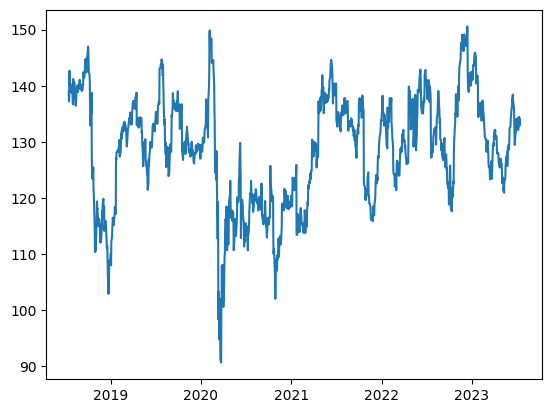

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index,df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_date(first_date_str)
  last_date  = string_to_date(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2020-07-16',
                                '2023-07-13',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2020-07-16,113.957932,115.296364,117.590820,118.556404
1,2020-07-17,115.296364,117.590820,118.556404,119.608032
2,2020-07-20,117.590820,118.556404,119.608032,120.812622
3,2020-07-21,118.556404,119.608032,120.812622,120.516251
4,2020-07-22,119.608032,120.812622,120.516251,123.011475
...,...,...,...,...,...
748,2023-07-07,133.669998,134.240005,132.160004,132.080002
749,2023-07-10,134.240005,132.160004,132.080002,132.899994
750,2023-07-11,132.160004,132.080002,132.899994,134.440002
751,2023-07-12,132.080002,132.899994,134.440002,132.839996


<h3><b>Reshaping the Data</b></h3>

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((753,), (753, 3, 1), (753,))

<h3><b>Splitting the Dataset</b></h3>

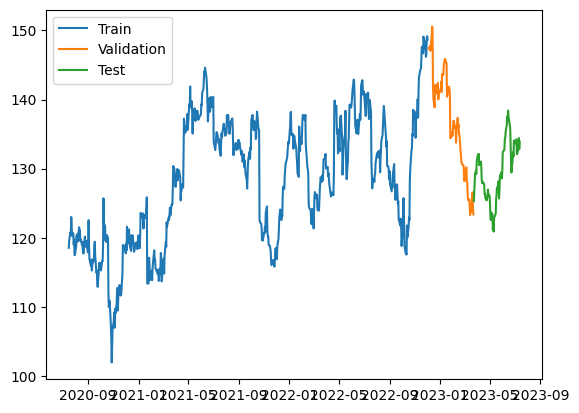

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

<h3><b>Training the Model</b></h3>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
19/19 [==============================] - 3s 35ms/step - loss: 16183.7080 - mean_absolute_error: 126.8840 - val_loss: 18193.7520 - val_mean_absolute_error: 134.6780
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 15630.9102 - mean_absolute_error: 124.6786 - val_loss: 17284.7559 - val_mean_absolute_error: 131.2583
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 14271.4619 - mean_absolute_error: 119.0943 - val_loss: 15157.9697 - val_mean_absolute_error: 122.8874
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 11475.8271 - mean_absolute_error: 106.6027 - val_loss: 10998.0596 - val_mean_absolute_error: 104.5856
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 6631.0679 - mean_absolute_error: 80.3753 - val_loss: 5204.2510 - val_mean_absolute_error: 71.7498
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 2339.6746 - mean_absolute_error: 46.2744 - val_loss: 12

<h3><b>Visualizing the Predictions </b></h3>

19/19 [==============================] - 0s 2ms/step


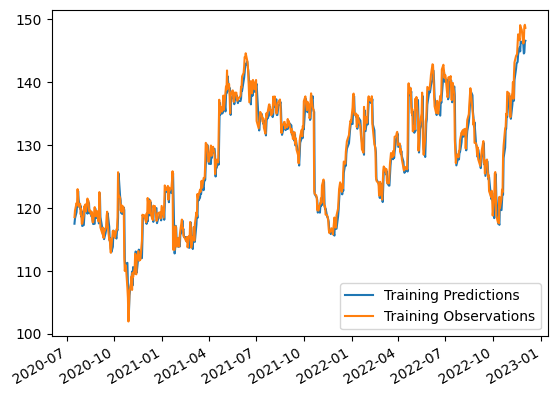

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.gcf().autofmt_xdate()
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 4ms/step


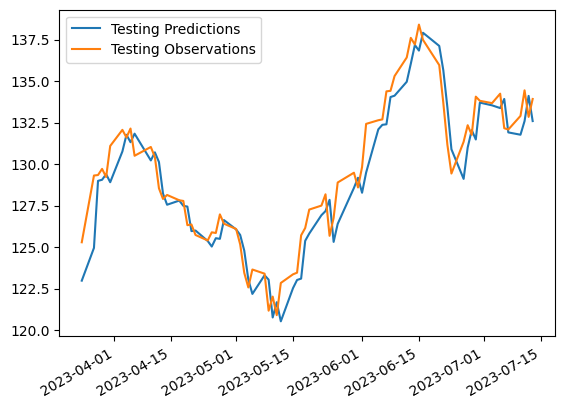

In [ ]:
test_predictions = model.predict(X_test).flatten()
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.gcf().autofmt_xdate()
plt.legend(['Testing Predictions', 'Testing Observations'])

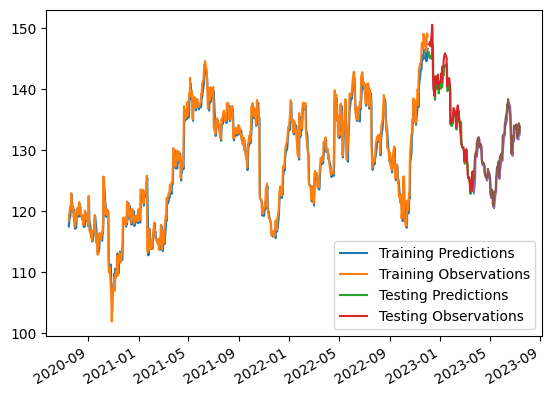

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.gcf().autofmt_xdate()
plt.legend(['Training Predictions',
            'Training Observations',
            'Testing Predictions',
            'Testing Observations'])